In [77]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/data.csv")
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)
df.drop('id', axis=1, inplace=True)
df.head(5)

,Country,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17
year,,,,,,,,,,,,,,,,,,
2000-01-01,Afghanistan,8.0,27,19,2,18,14,19,44,5,NaN,34,96,99,NaN,56,42,36
2001-01-01,Afghanistan,8.0,30,19,2,18,13,22,44,5,NaN,31,96,99,NaN,56,42,36
2002-01-01,Afghanistan,9.0,30,20,2,18,16,21,44,5,NaN,32,95,99,NaN,56,42,36
2003-01-01,Afghanistan,10.0,32,20,2,18,17,24,44,5,NaN,32,95,98,NaN,56,42,36
2004-01-01,Afghanistan,10.0,31,22,2,18,16,27,44,5,NaN,33,96,98,NaN,56,42,36


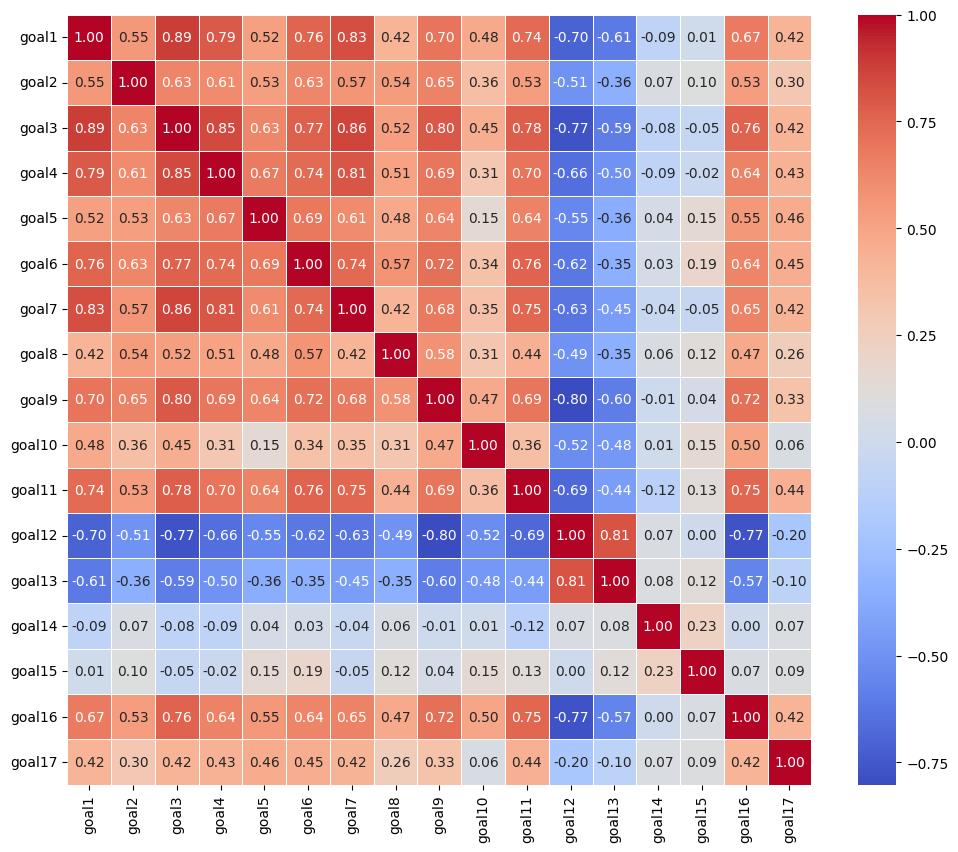

In [78]:
import seaborn as sns
correlation_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(12, 10))
#plt.matshow(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


/tmp/ipykernel_143128/1814923368.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  changes = df.iloc[:, 1:].pct_change()


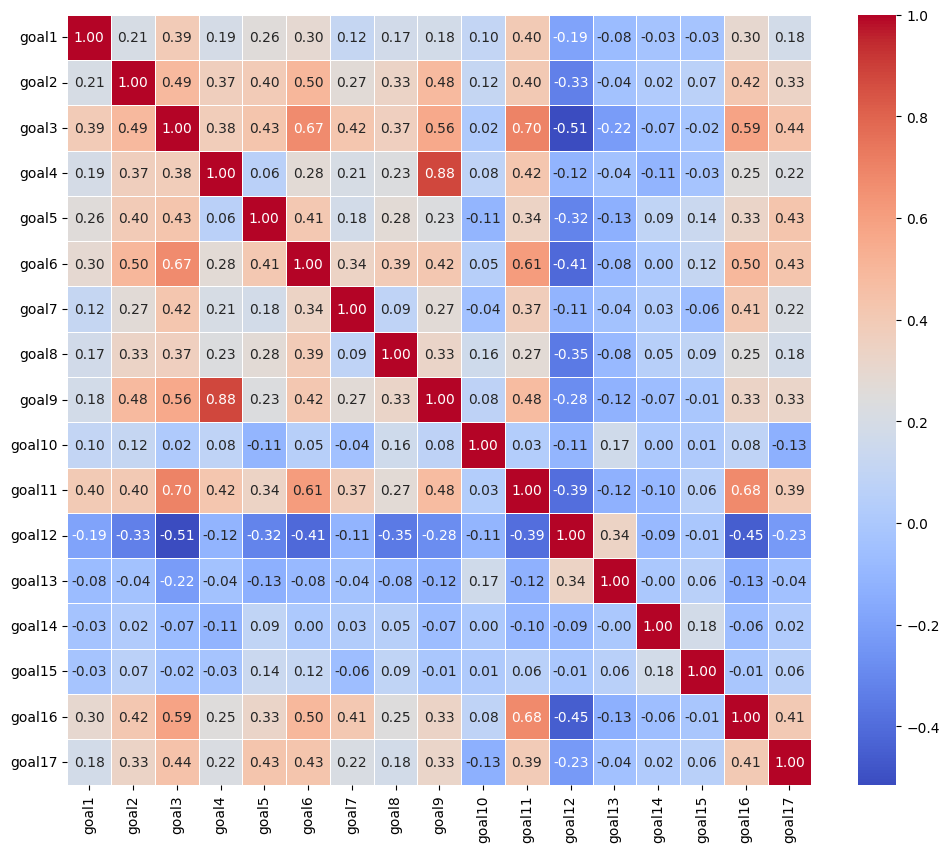

In [79]:
import seaborn as sns
plt.figure(figsize=(12, 10))
changes = df.iloc[:, 1:].pct_change()
correlation_changes = changes.corr()
sns.heatmap(correlation_changes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

autocorrelation (or serial correlation)
correlation of the time series with a lagged copy of itself

In [80]:
anual_lag = df.iloc[:, 1:].resample('YE').last()
anual_pct_change = anual_lag.pct_change()
goals = [f'goal{i}' for i in range(1, 18)]
for goal in goals:
    autocorrelation = anual_pct_change[goal].autocorr()
    print(f"The autocorrelation of {goal} with the percentage change of its previous year is {autocorrelation:.2f}")


The autocorrelation of goal1 with the percentage change of its previous year is 0.00
The autocorrelation of goal2 with the percentage change of its previous year is -0.31
The autocorrelation of goal3 with the percentage change of its previous year is 0.54
The autocorrelation of goal4 with the percentage change of its previous year is 0.20
The autocorrelation of goal5 with the percentage change of its previous year is -0.11
The autocorrelation of goal6 with the percentage change of its previous year is 0.18
The autocorrelation of goal7 with the percentage change of its previous year is 0.08
The autocorrelation of goal8 with the percentage change of its previous year is -0.09
The autocorrelation of goal9 with the percentage change of its previous year is 0.39
The autocorrelation of goal10 with the percentage change of its previous year is -0.09
The autocorrelation of goal11 with the percentage change of its previous year is -0.71
The autocorrelation of goal12 with the percentage change o

In [81]:
for goal in goals:
    anual_diff = df[goal].diff()
    autocorrelation_diff = anual_diff.autocorr()
    print(f"The autocorrelation of {goal} with its previous year is {autocorrelation_diff:.2f}")


The autocorrelation of goal1 with its previous year is -0.00
The autocorrelation of goal2 with its previous year is -0.07
The autocorrelation of goal3 with its previous year is -0.00
The autocorrelation of goal4 with its previous year is -0.00
The autocorrelation of goal5 with its previous year is -0.02
The autocorrelation of goal6 with its previous year is -0.03
The autocorrelation of goal7 with its previous year is -0.01
The autocorrelation of goal8 with its previous year is -0.01
The autocorrelation of goal9 with its previous year is 0.00
The autocorrelation of goal10 with its previous year is -0.02
The autocorrelation of goal11 with its previous year is -0.01
The autocorrelation of goal12 with its previous year is -0.01
The autocorrelation of goal13 with its previous year is -0.00
The autocorrelation of goal14 with its previous year is -0.04
The autocorrelation of goal15 with its previous year is -0.01
The autocorrelation of goal16 with its previous year is -0.00
The autocorrelatio

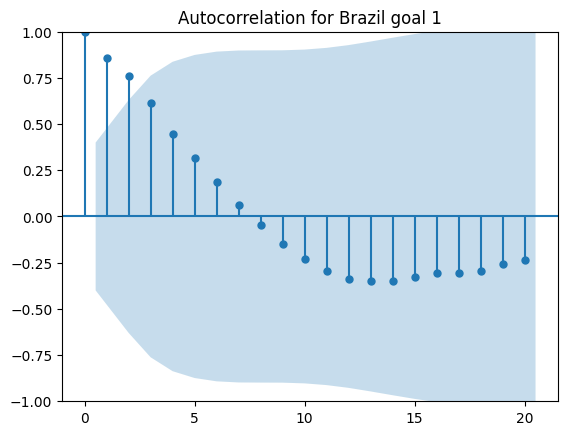

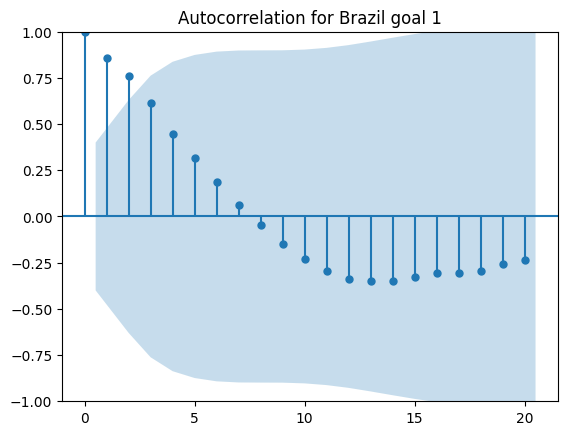

In [102]:
from statsmodels.graphics.tsaplots import plot_acf
country_data = df[df['Country'] == 'Brazil']
plot_acf(country_data['goal1'], lags=20, alpha=0.05, title=f'Autocorrelation for Brazil goal 1')

The autocorrelation of goal2 is 0.95
The approximate confidence interval is +/- 0.03


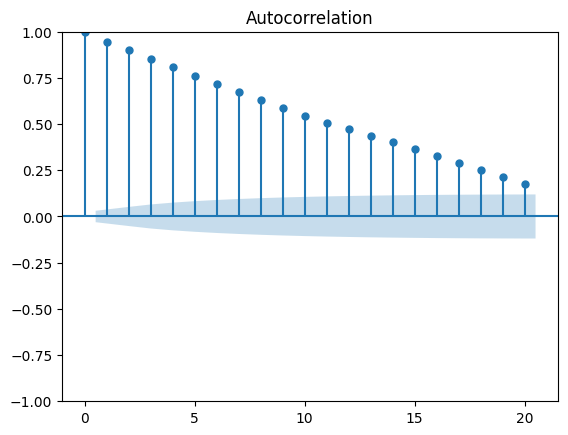

In [95]:
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

autocorrelation = df['goal2'].autocorr()
print("The autocorrelation of goal2 is %4.2f" %(autocorrelation))

nobs = len(df['goal2'])

conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

plot_acf(df['goal2'], alpha=0.05, lags=20)
plt.show()


In [111]:
from statsmodels.graphics.tsaplots import plot_acf
country_data = df[df['Country'] == 'Brazil']
from statsmodels.tsa.stattools import adfuller

for goal in goals:
    random_walk = adfuller(country_data[goal])
    if random_walk[1] <= 0.05:
        # if the p-value is less than 0.05, the null hypothesis is rejected.
        # in other words, we reject the idea that the series is a random walk with 95% confidence
        print(f"{goal} is stationary with a p value of {random_walk[1]}")
    else:
        # when the p-value is 1, we cannot reject the hypothesis that the data follows a random walk
        print(f"{goal} is a random walk")

goal1 is stationary with a p value of 0.0013638125519277668
goal2 is a random walk
goal3 is a random walk
goal4 is a random walk
goal5 is a random walk
goal6 is a random walk
goal7 is a random walk
goal8 is stationary with a p value of 0.0024811408728313803
goal9 is a random walk
goal10 is stationary with a p value of 0.03317077975418127
goal11 is a random walk
goal12 is a random walk
goal13 is a random walk
goal14 is a random walk
goal15 is stationary with a p value of 0.005213756979374177
goal16 is a random walk
goal17 is a random walk
